In [11]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math 
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:




data_1 = pd.read_csv('turnstile_200104.txt', sep = ',',header = 0)
data_2 = pd.read_csv('turnstile_200111.txt', sep = ',',header = 0)
data_3 = pd.read_csv('turnstile_200118.txt', sep = ',',header = 0)
data_4 = pd.read_csv('turnstile_200125.txt', sep = ',',header = 0)


# ///


data_5 = pd.read_csv('turnstile_200201.txt', sep = ',',header = 0)
data_6 = pd.read_csv('turnstile_200208.txt', sep = ',',header = 0)
data_7 = pd.read_csv('turnstile_200215.txt', sep = ',',header = 0)
data_8 = pd.read_csv('turnstile_200222.txt', sep = ',',header = 0)
data_9 = pd.read_csv('turnstile_200229.txt', sep = ',',header = 0)




data_10 = pd.read_csv('turnstile_200307.txt', sep = ',',header = 0)
data_11 = pd.read_csv('turnstile_200314.txt', sep = ',',header = 0)
data_12 = pd.read_csv('turnstile_200321.txt', sep = ',',header = 0)
data_13 = pd.read_csv('turnstile_200328.txt', sep = ',',header = 0)


data_1.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']      
data_2.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']      
data_3.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']
data_4.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']

data_5.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']
data_6.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']      
data_7.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']      
data_8.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']
data_9.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']

data_10.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']    
data_11.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']      
data_12.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']      
data_13.columns =['C/A','unit','SCP','Station','LINENAME','DIVISION','date','time','desc','entries','exits']
 
    
    
    
    
frames = [data_1, data_2, data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13]


InfectionControlReg = pd.concat(frames)

# 1- Cleaning the data 




1- delete the space in EXITS column

In [13]:
InfectionControlReg.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

2- add Date_time have the time with date together 

In [14]:
InfectionControlReg['Date_TIME'] = pd.to_datetime(InfectionControlReg.date+" "+InfectionControlReg.time ,format='%m/%d/%Y %H:%M:%S')
InfectionControlReg

,C/A,unit,SCP,Station,LINENAME,DIVISION,date,time,desc,entries,exits,Date_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,2019-12-28 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,2019-12-28 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594,2019-12-28 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647,2019-12-28 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713,2019-12-28 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
205757,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,05:00:00,REGULAR,5554,514,2020-03-27 05:00:00
205758,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,09:00:00,REGULAR,5554,514,2020-03-27 09:00:00
205759,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,13:00:00,REGULAR,5554,514,2020-03-27 13:00:00
205760,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,17:00:00,REGULAR,5554,514,2020-03-27 17:00:00


3-drop any Entries has zero Value

In [15]:



df_entries_negative = InfectionControlReg[ InfectionControlReg['entries'] == 0 ]  # Step 1
InfectionControlReg.drop(df_entries_negative.index, axis=0) # Step 2






,C/A,unit,SCP,Station,LINENAME,DIVISION,date,time,desc,entries,exits,Date_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,2019-12-28 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,2019-12-28 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594,2019-12-28 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647,2019-12-28 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713,2019-12-28 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
205757,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,05:00:00,REGULAR,5554,514,2020-03-27 05:00:00
205758,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,09:00:00,REGULAR,5554,514,2020-03-27 09:00:00
205759,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,13:00:00,REGULAR,5554,514,2020-03-27 13:00:00
205760,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,17:00:00,REGULAR,5554,514,2020-03-27 17:00:00


4- add Week days and week index for every day 

In [16]:

InfectionControlReg['WEEKDAY'] = pd.to_datetime(InfectionControlReg['date']).dt.day_name()
InfectionControlReg['WEEKDAY_INDEX'] = pd.to_datetime(InfectionControlReg['date']).dt.weekday



5- remove the duplicate value

In [17]:
InfectionControlReg.sort_values(["C/A", "unit", "SCP", "Station",'date'], 
                          inplace=True, ascending=False)
InfectionControlReg.drop_duplicates(subset=["C/A", "unit", "SCP", "Station", "date"], inplace=True)




6- remove the duplicate value and displyes the Maximum value in the entries 

In [18]:
turnstiles_daily_entries = (InfectionControlReg.groupby(["C/A", "unit", "SCP", "Station", "Date_TIME","date","time",'WEEKDAY','WEEKDAY_INDEX'],as_index=False)
                        .entries.first())


turnstiles_daily_exits = (InfectionControlReg.groupby(["C/A", "unit", "SCP", "Station", "Date_TIME","date","time","WEEKDAY",'WEEKDAY_INDEX'],as_index=False)
                        .exits.first())


## flattens the data
mta_entries_flat = turnstiles_daily_entries.reset_index()
mta_exits_flat = turnstiles_daily_exits.reset_index()

df = pd.merge(mta_entries_flat, mta_exits_flat, how='outer')



4- when I merge between Entries and Exits , new cloumns autmatically added , so I drop it 

In [19]:
df.drop('index', inplace=True, axis=1)

5- I added 3 new columns that take the pervious value to Entries and Exits and dates

In [20]:
df[["PREV_DATE", "PREV_ENTRIES",'PREV_EXITS']] = (df.groupby(["C/A", "unit", "SCP", "Station"])["date", "entries",'exits']
.apply(lambda grp: grp.shift(1)))



<ipython-input-20-dac01b39b225>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[["PREV_DATE", "PREV_ENTRIES",'PREV_EXITS']] = (df.groupby(["C/A", "unit", "SCP", "Station"])["date", "entries",'exits']


6- when I add news 3 columns by shift , I got on first row 0 , so I will drop it  

In [21]:
df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

df

,C/A,unit,SCP,Station,Date_TIME,date,time,WEEKDAY,WEEKDAY_INDEX,entries,exits,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,2019-12-29 03:00:00,12/29/2019,03:00:00,Sunday,6,7325192,2482766,12/28/2019,7324295.0,2482512.0
2,A002,R051,02-00-00,59 ST,2019-12-30 03:00:00,12/30/2019,03:00:00,Monday,0,7325799,2482973,12/29/2019,7325192.0,2482766.0
3,A002,R051,02-00-00,59 ST,2019-12-31 03:00:00,12/31/2019,03:00:00,Tuesday,1,7326977,2483383,12/30/2019,7325799.0,2482973.0
4,A002,R051,02-00-00,59 ST,2020-01-01 03:00:00,01/01/2020,03:00:00,Wednesday,2,7328037,2483731,12/31/2019,7326977.0,2483383.0
5,A002,R051,02-00-00,59 ST,2020-01-02 03:00:00,01/02/2020,03:00:00,Thursday,3,7328527,2483915,01/01/2020,7328037.0,2483731.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446540,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-23 01:00:00,03/23/2020,01:00:00,Monday,0,5554,514,03/22/2020,5554.0,508.0
446541,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-24 01:00:00,03/24/2020,01:00:00,Tuesday,1,5554,514,03/23/2020,5554.0,514.0
446542,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-25 01:00:00,03/25/2020,01:00:00,Wednesday,2,5554,514,03/24/2020,5554.0,514.0
446543,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-26 01:00:00,03/26/2020,01:00:00,Thursday,3,5554,514,03/25/2020,5554.0,514.0


- Because the entries and exites Cumulative , so I want sure that some PREV_ENTRIES has greater than of entries

In [22]:
(df[df["entries"] < df["PREV_ENTRIES"]]
    .groupby(["C/A", "unit", "SCP", "Station"])
    .size())

C/A   unit  SCP       Station        
A002  R051  02-06-00  59 ST               1
A006  R079  00-03-00  5 AV/59 ST          1
A011  R080  01-03-00  57 ST-7 AV         90
A025  R023  01-03-01  34 ST-HERALD SQ    90
            01-06-02  34 ST-HERALD SQ     1
                                         ..
R639  R109  00-05-02  CHURCH AV           1
R645  R110  00-06-02  FLATBUSH AV-B.C     1
R646  R110  01-00-01  FLATBUSH AV-B.C    10
R729  R292  00-00-01  BAYCHESTER AV       1
R730  R431  00-00-04  EASTCHSTER/DYRE    87
Length: 294, dtype: int64

so by this function , I added DAILY_ENTRIES and DAILY_EXITS columns , which calculate the rihgt value 

In [23]:
def get_daily_counts_Entries(current_row,previous_row,max_counter):
    counter = current_row - previous_row
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(current_row,previous_row)
        counter = min(current_row,previous_row)
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter


# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
# df["DAILY_ENTRIES"] = df.apply(get_daily_counts_Entries, axis=1, max_counter=1000000) 


df['DAILY_ENTRIES'] = df.apply(lambda x: get_daily_counts_Entries(x['entries'], x['PREV_ENTRIES'],max_counter=1000000), axis=1)


df['DAILY_EXITS'] = df.apply(lambda x: get_daily_counts_Entries(x['exits'], x['PREV_EXITS'],max_counter=1000000), axis=1)

76 9437450.0
458780 85175007.0
1176 1180387.0
309 7251357.0
696 1203538.0
209 1090783.0
435 6612150.0
2031652 367632.0
170526823 1802589.0
475957442 7480934.0
2729 3117758.0
618293 2633475.0
17126293 19675797.0
15065833 17126095.0
25525733 15065579.0
12309510 25525268.0
1797 1455622.0
209 1100925.0
1786 6132538.0
108 8294888.0
35 168627967.0
570 2379784.0
7 2344491.0
10 11957681.0
321184286 5645170.0
307624726 321184286.0
722 4895019.0
55 1317615.0
4785511 11470775.0
66 4835856.0
419 2018060.0
270532634 535694.0
1287 14003866.0
167 2300797.0
393296 2064683.0
2944 6568201.0
587 22737699.0
497 3854848.0
524549 118146212.0
3 69159701.0
1144 9501559.0
127 8437383.0
1622 1510930.0
137 2311116.0
1245970956 1791.0
4 3529766.0
53 7703724.0
577350 2819465.0
1 9046508.0
155 1516952.0
629 3243187.0
215 1408008.0
106 2787750.0
53 4982193.0
572 7270898.0
449 21914733.0
1224795380 6296.0
1847 9753069.0
1022 12445572.0
2177 16347721.0
739 6567565.0
1254418324 28554762.0
3153 1254422239.0
2216 3323164

# 2- Filtering 

1- I add TRAFFIC Columns which is DAILY_ENTRIES+DAILY_EXITS

In [24]:
df['TRAFFIC'] = df['DAILY_ENTRIES'] + df['DAILY_EXITS']


df


,C/A,unit,SCP,Station,Date_TIME,date,time,WEEKDAY,WEEKDAY_INDEX,entries,exits,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
1,A002,R051,02-00-00,59 ST,2019-12-29 03:00:00,12/29/2019,03:00:00,Sunday,6,7325192,2482766,12/28/2019,7324295.0,2482512.0,897.0,254.0,1151.0
2,A002,R051,02-00-00,59 ST,2019-12-30 03:00:00,12/30/2019,03:00:00,Monday,0,7325799,2482973,12/29/2019,7325192.0,2482766.0,607.0,207.0,814.0
3,A002,R051,02-00-00,59 ST,2019-12-31 03:00:00,12/31/2019,03:00:00,Tuesday,1,7326977,2483383,12/30/2019,7325799.0,2482973.0,1178.0,410.0,1588.0
4,A002,R051,02-00-00,59 ST,2020-01-01 03:00:00,01/01/2020,03:00:00,Wednesday,2,7328037,2483731,12/31/2019,7326977.0,2483383.0,1060.0,348.0,1408.0
5,A002,R051,02-00-00,59 ST,2020-01-02 03:00:00,01/02/2020,03:00:00,Thursday,3,7328527,2483915,01/01/2020,7328037.0,2483731.0,490.0,184.0,674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446540,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-23 01:00:00,03/23/2020,01:00:00,Monday,0,5554,514,03/22/2020,5554.0,508.0,0.0,6.0,6.0
446541,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-24 01:00:00,03/24/2020,01:00:00,Tuesday,1,5554,514,03/23/2020,5554.0,514.0,0.0,0.0,0.0
446542,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-25 01:00:00,03/25/2020,01:00:00,Wednesday,2,5554,514,03/24/2020,5554.0,514.0,0.0,0.0,0.0
446543,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-26 01:00:00,03/26/2020,01:00:00,Thursday,3,5554,514,03/25/2020,5554.0,514.0,0.0,0.0,0.0


2- I filter the time which I want to take ruch hours 

In [25]:
df_time = df[(df['time']>'00:00:00') & (df['time']<'08:00:00')].reset_index()


3-I filter the week which I want to take time works and I remove zero's exits

In [26]:
df_exits_negative = df_time[ (df_time['exits'] == 0 ) |
                       
                      (df_time['WEEKDAY'] == 'Saturday' ) |  (df_time['WEEKDAY'] == 'Friday')] 
df_time = df_time.drop(df_exits_negative.index, axis=0) # Step 2
df_time

,index,C/A,unit,SCP,Station,Date_TIME,date,time,WEEKDAY,WEEKDAY_INDEX,entries,exits,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
0,1,A002,R051,02-00-00,59 ST,2019-12-29 03:00:00,12/29/2019,03:00:00,Sunday,6,7325192,2482766,12/28/2019,7324295.0,2482512.0,897.0,254.0,1151.0
1,2,A002,R051,02-00-00,59 ST,2019-12-30 03:00:00,12/30/2019,03:00:00,Monday,0,7325799,2482973,12/29/2019,7325192.0,2482766.0,607.0,207.0,814.0
2,3,A002,R051,02-00-00,59 ST,2019-12-31 03:00:00,12/31/2019,03:00:00,Tuesday,1,7326977,2483383,12/30/2019,7325799.0,2482973.0,1178.0,410.0,1588.0
3,4,A002,R051,02-00-00,59 ST,2020-01-01 03:00:00,01/01/2020,03:00:00,Wednesday,2,7328037,2483731,12/31/2019,7326977.0,2483383.0,1060.0,348.0,1408.0
4,5,A002,R051,02-00-00,59 ST,2020-01-02 03:00:00,01/02/2020,03:00:00,Thursday,3,7328527,2483915,01/01/2020,7328037.0,2483731.0,490.0,184.0,674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262983,446539,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-22 01:00:00,03/22/2020,01:00:00,Sunday,6,5554,508,03/21/2020,5554.0,508.0,0.0,0.0,0.0
262984,446540,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-23 01:00:00,03/23/2020,01:00:00,Monday,0,5554,514,03/22/2020,5554.0,508.0,0.0,6.0,6.0
262985,446541,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-24 01:00:00,03/24/2020,01:00:00,Tuesday,1,5554,514,03/23/2020,5554.0,514.0,0.0,0.0,0.0
262986,446542,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-25 01:00:00,03/25/2020,01:00:00,Wednesday,2,5554,514,03/24/2020,5554.0,514.0,0.0,0.0,0.0


4-I filter the Stations on which the fondation choose 

In [27]:
StationFilter=df_time[(
df_time["Station"] == "34 ST-HERALD SQ") | 
(df_time["Station"] == "RIT-ROOSEVELT") | 
(df_time["Station"] == "50 ST") | 
(df_time["Station"] == "59 ST") |
(df_time["Station"] == "57 ST-7 AV")|
(df_time["Station"] == "90 ST-ELMHURST") | 
(df_time["Station"] == "5 AVE") | 
(df_time["Station"] == "161/YANKEE STAD") |
(df_time["Station"] == "74 ST-BROADWAY") | 
(df_time["Station"] == "176 ST") | 
(df_time["Station"] == "125 ST") |
(df_time["Station"] == "231 ST") | 
(df_time["Station"] == "FLATBUSH AV-B.C")]




StationFilter

,index,C/A,unit,SCP,Station,Date_TIME,date,time,WEEKDAY,WEEKDAY_INDEX,entries,exits,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
0,1,A002,R051,02-00-00,59 ST,2019-12-29 03:00:00,12/29/2019,03:00:00,Sunday,6,7325192,2482766,12/28/2019,7324295.0,2482512.0,897.0,254.0,1151.0
1,2,A002,R051,02-00-00,59 ST,2019-12-30 03:00:00,12/30/2019,03:00:00,Monday,0,7325799,2482973,12/29/2019,7325192.0,2482766.0,607.0,207.0,814.0
2,3,A002,R051,02-00-00,59 ST,2019-12-31 03:00:00,12/31/2019,03:00:00,Tuesday,1,7326977,2483383,12/30/2019,7325799.0,2482973.0,1178.0,410.0,1588.0
3,4,A002,R051,02-00-00,59 ST,2020-01-01 03:00:00,01/01/2020,03:00:00,Wednesday,2,7328037,2483731,12/31/2019,7326977.0,2483383.0,1060.0,348.0,1408.0
4,5,A002,R051,02-00-00,59 ST,2020-01-02 03:00:00,01/02/2020,03:00:00,Thursday,3,7328527,2483915,01/01/2020,7328037.0,2483731.0,490.0,184.0,674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262983,446539,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-22 01:00:00,03/22/2020,01:00:00,Sunday,6,5554,508,03/21/2020,5554.0,508.0,0.0,0.0,0.0
262984,446540,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-23 01:00:00,03/23/2020,01:00:00,Monday,0,5554,514,03/22/2020,5554.0,508.0,0.0,6.0,6.0
262985,446541,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-24 01:00:00,03/24/2020,01:00:00,Tuesday,1,5554,514,03/23/2020,5554.0,514.0,0.0,0.0,0.0
262986,446542,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-25 01:00:00,03/25/2020,01:00:00,Wednesday,2,5554,514,03/24/2020,5554.0,514.0,0.0,0.0,0.0


# max the TRAFFIC

In [28]:
StationFilter.TRAFFIC.max()

680735.0

# max the DAILY_ENTRIES

In [29]:
StationFilter.DAILY_ENTRIES.max()

458780.0

# Function that take 1 from 2000 from the traffic and add it in Registerars columns 

In [30]:
def RegisterColumns(TRAFFIC):
    Registerars=int(TRAFFIC*(1/2000))
    
    
    return Registerars




StationFilter['Registerars'] = StationFilter.TRAFFIC.apply(RegisterColumns)


<ipython-input-30-ccee9bb9d5a8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StationFilter['Registerars'] = StationFilter.TRAFFIC.apply(RegisterColumns)


# add sum of registers by group by of Station, date, C/A, unit and SCP

In [31]:


df_groupby_Statioin=StationFilter.groupby( ["Station",'date','C/A','unit','SCP']).sum().sort_values('Registerars', ascending=False).reset_index()

Numbers of registers in the course 

In [32]:
df_groupby_Statioin.Registerars.sum()

8858

# add sum of registers and Traffic  by group by of Station

In [33]:
grouped_Registerars_TRAFFIC_Station = StationFilter.groupby(['Station'])[['Registerars','TRAFFIC']].sum().reset_index()
Station_Registerars=grouped_Registerars_TRAFFIC_Station.sort_values('Registerars', ascending=False)
Station_Registerars


,Station,Registerars,TRAFFIC
4,34 ST-HERALD SQ,3841,10339660.0
8,59 ST,1073,4537247.0
0,125 ST,1030,3336226.0
6,50 ST,845,3434480.0
7,57 ST-7 AV,704,2307026.0
3,231 ST,469,1160736.0
10,90 ST-ELMHURST,288,1018957.0
1,161/YANKEE STAD,268,1607381.0
5,5 AVE,203,873122.0
2,176 ST,57,351181.0


-using matplotlib Library to Draw the relation between Station and Registerars

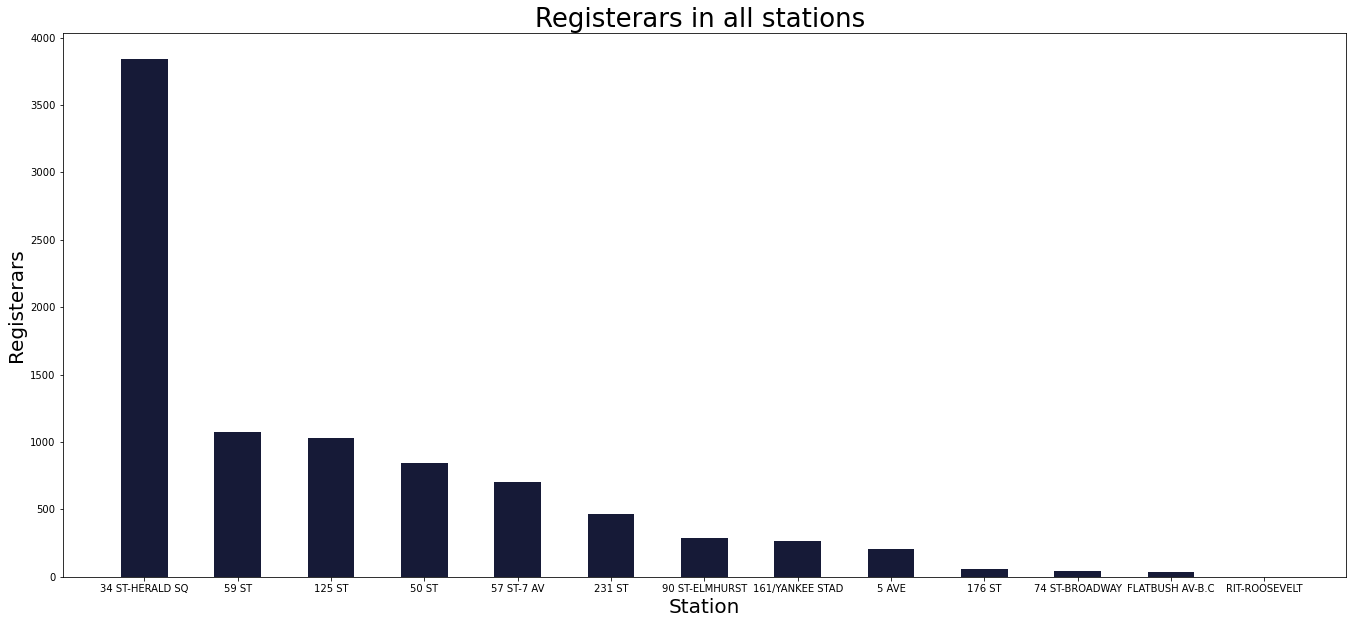

In [34]:
fig = plt.figure(figsize = (23, 10))
 
# creating the bar plot
plt.bar(Station_Registerars['Station'] , Station_Registerars['Registerars'], color ='#161a37',
        width = 0.5)
 
plt.xlabel("Station",fontsize = 20)
plt.ylabel("Registerars",fontsize = 20)
plt.title("Registerars in all stations " ,fontsize = 26)
plt.show()

-using matplotlib Library to Draw the relation between Station and TRAFFIC

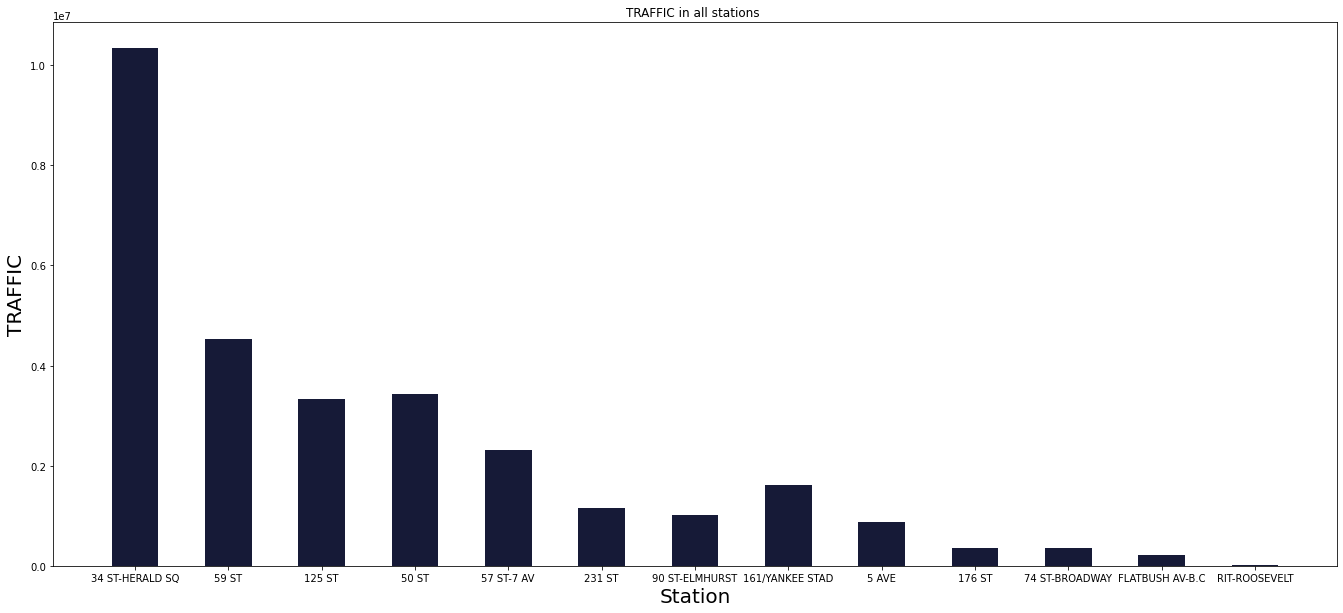

In [35]:
fig = plt.figure(figsize = (23, 10))
 
# creating the bar plot
plt.bar(Station_Registerars['Station'] , Station_Registerars['TRAFFIC'], color ='#161a37',
        width = 0.5)
 
plt.xlabel("Station",fontsize = 20)
plt.ylabel("TRAFFIC",fontsize = 20)
plt.title("TRAFFIC in all stations ")
plt.show()

- here the mean to every Station with its plot

In [36]:
grouped_Registerars_TRAFFIC_Station_mean = StationFilter.groupby(['Station'])[['Registerars','TRAFFIC']].mean().reset_index()
Station_Registerars_mean=grouped_Registerars_TRAFFIC_Station_mean.sort_values('Registerars', ascending=False)
Station_Registerars_mean


,Station,Registerars,TRAFFIC
4,34 ST-HERALD SQ,1.395205,3755.779150
3,231 ST,1.181360,2923.768262
0,125 ST,0.783866,2538.984779
7,57 ST-7 AV,0.734864,2408.169102
10,90 ST-ELMHURST,0.612766,2167.993617
6,50 ST,0.475788,1933.828829
8,59 ST,0.447456,1892.096330
5,5 AVE,0.399606,1718.744094
2,176 ST,0.279412,1721.475490
9,74 ST-BROADWAY,0.172549,1401.925490


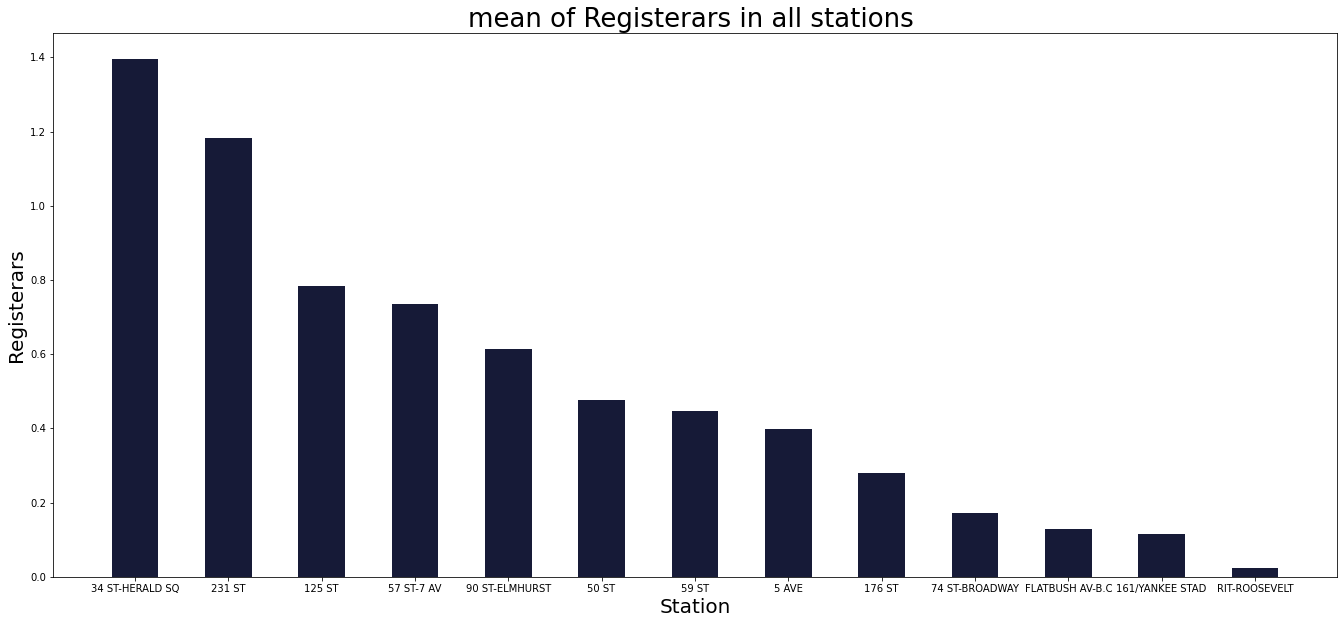

In [37]:
fig = plt.figure(figsize = (23, 10))
 
# creating the bar plot
plt.bar(Station_Registerars_mean['Station'] , Station_Registerars_mean['Registerars'], color ='#161a37',
        width = 0.5)
 
plt.xlabel("Station",fontsize = 20)
plt.ylabel("Registerars",fontsize = 20)
plt.title("mean of Registerars in all stations " ,fontsize = 26)
plt.show()

-using matplotlib Library to Draw the relation between WEEKDAYs and Registerars

In [38]:
WEEKDAY_Register = StationFilter.groupby('WEEKDAY')[['Registerars']].sum().reset_index()
Registerars_Sum_PerDay=WEEKDAY_Register.sort_values('Registerars', ascending=False).reset_index()

Registerars_Sum_PerDay

,index,WEEKDAY,Registerars
0,4,Wednesday,2773
1,2,Thursday,2416
2,3,Tuesday,1955
3,1,Sunday,1200
4,0,Monday,514


Text(0.5, 1.0, 'Sum of Registerars in weekdays ')

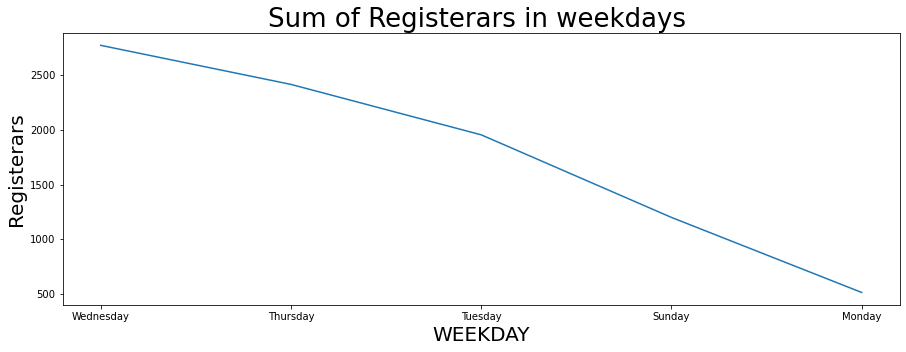

In [39]:
plt.figure(figsize=(15,5))
plt.plot(Registerars_Sum_PerDay.WEEKDAY,Registerars_Sum_PerDay.Registerars)


plt.xlabel("WEEKDAY",fontsize = 20)
plt.ylabel("Registerars",fontsize = 20)
plt.title("Sum of Registerars in weekdays " ,fontsize = 26)

-using matplotlib Library to Draw the relation between WEEKDAYs and TRAFFIC

In [40]:
WEEKDAY_Traffic = StationFilter.groupby('WEEKDAY')[['TRAFFIC']].sum().reset_index()
Traffic_Sum_PerDay=WEEKDAY_Traffic.sort_values('TRAFFIC', ascending=False).reset_index()

Traffic_Sum_PerDay

,index,WEEKDAY,TRAFFIC
0,4,Wednesday,7910772.0
1,2,Thursday,7155560.0
2,3,Tuesday,6303560.0
3,1,Sunday,4925436.0
4,0,Monday,3265993.0


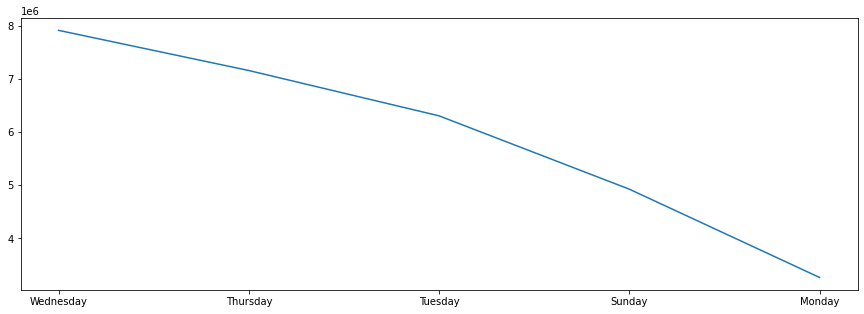

In [41]:
plt.figure(figsize=(15,5))
plt.plot(Traffic_Sum_PerDay.WEEKDAY,Traffic_Sum_PerDay.TRAFFIC)

In [43]:
grouped_Registerars_TRAFFIC_Station_mean.describe()

,Registerars,TRAFFIC
count,13.000000,13.000000
mean,0.519268,1865.477165
std,0.417469,947.693944
min,0.023810,289.869048
25%,0.172549,1401.925490
50%,0.447456,1892.096330
75%,0.734864,2408.169102
max,1.395205,3755.779150


-here the mean for Registerars and TRAFFIC using Stations and Weekdays  

In [44]:
grouped_Registerars_TRAFFIC_mean = StationFilter.groupby(['Station','WEEKDAY'])[['Registerars','TRAFFIC']].mean()


d_Registerars_mean=grouped_Registerars_TRAFFIC_mean.sort_values(['Registerars','TRAFFIC'], ascending=False)

d_Registerars_mean.reset_index()

,Station,WEEKDAY,Registerars,TRAFFIC
0,231 ST,Thursday,3.269231,7193.410256
1,231 ST,Wednesday,2.448718,5535.333333
2,34 ST-HERALD SQ,Wednesday,2.289425,5482.814471
3,34 ST-HERALD SQ,Thursday,1.576994,4056.040816
4,34 ST-HERALD SQ,Tuesday,1.469388,3892.627087
...,...,...,...,...
60,231 ST,Monday,0.000000,403.012821
61,RIT-ROOSEVELT,Tuesday,0.000000,280.277778
62,RIT-ROOSEVELT,Wednesday,0.000000,260.055556
63,RIT-ROOSEVELT,Sunday,0.000000,251.333333


# add sum of registers by group by of time

using matplotlib Library to Draw the relation between time and Registerars

In [45]:
Sum_timeRegisterars= StationFilter.groupby('time')[['Registerars']].sum().reset_index()
Sorting_Registerars_time=Sum_timeRegisterars.sort_values('time', ascending=True).reset_index()

Sorting_Registerars_time

,index,time,Registerars
0,0,00:22:00,26
1,1,01:00:00,151
2,2,03:00:00,8067
3,3,03:22:00,240
4,4,04:00:00,77
5,5,04:22:00,2
6,6,07:00:00,295
7,7,07:22:00,0


In [46]:
mean_timeRegisterars= StationFilter.groupby('time')[['Registerars']].mean().reset_index()
Sorting_Registerars_time_mean=mean_timeRegisterars.sort_values('time', ascending=True).reset_index()

Sorting_Registerars_time_mean

,index,time,Registerars
0,0,00:22:00,0.051587
1,1,01:00:00,0.235569
2,2,03:00:00,0.769238
3,3,03:22:00,0.133705
4,4,04:00:00,0.353211
5,5,04:22:00,0.055556
6,6,07:00:00,8.676471
7,7,07:22:00,0.000000


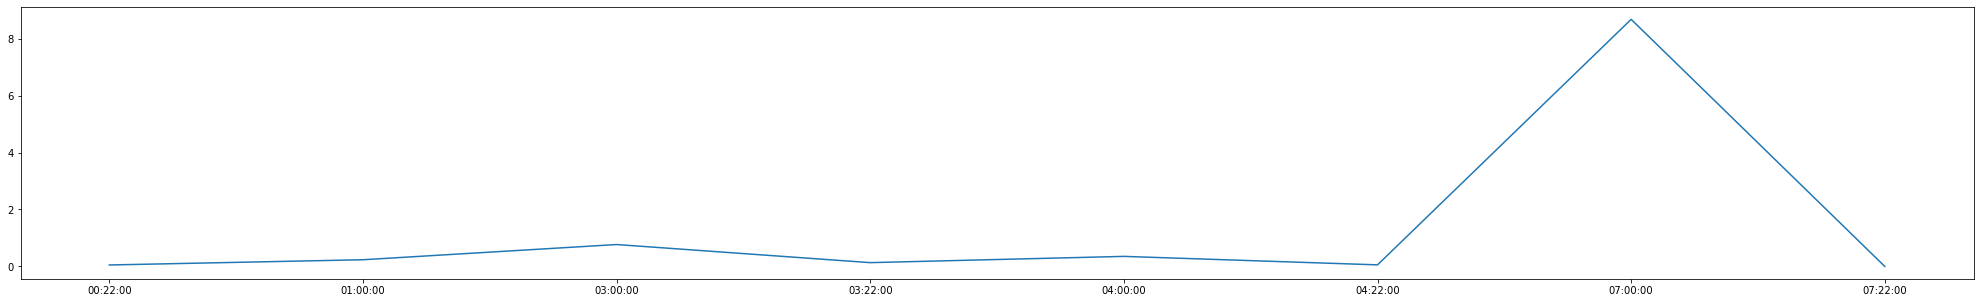

In [49]:
plt.figure(figsize=(35,5))
plt.plot(Sorting_Registerars_time_mean.time,Sorting_Registerars_time_mean.Registerars)

# add sum of TRAFFIC by group by of time

using matplotlib Library to Draw the relation between time and TRAFFIC

In [50]:
time_Register_TRAFFIC= StationFilter.groupby('time')[['TRAFFIC']].sum().reset_index()
TRAFFIC_time=time_Register_TRAFFIC.sort_values('time', ascending=True).reset_index()

TRAFFIC_time

,index,time,TRAFFIC
0,0,00:22:00,244958.0
1,1,01:00:00,745213.0
2,2,03:00:00,26217366.0
3,3,03:22:00,1338680.0
4,4,04:00:00,365261.0
5,5,04:22:00,20652.0
6,6,07:00:00,626100.0
7,7,07:22:00,3091.0


Text(0.5, 1.0, 'Sum of Traffic in time ')

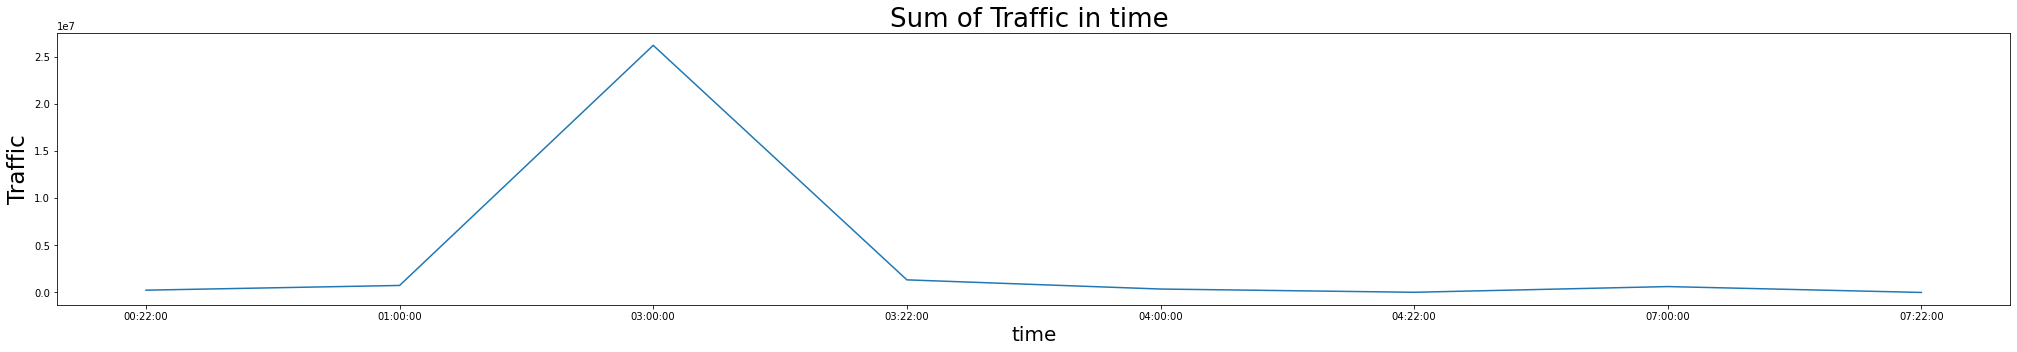

In [51]:
plt.figure(figsize=(35,5))
plt.plot(TRAFFIC_time.time,TRAFFIC_time.TRAFFIC)


plt.xlabel("time",fontsize = 20)
plt.ylabel("Traffic",fontsize = 23)
plt.title("Sum of Traffic in time " ,fontsize = 26)

here the correlation between Registerars and TRAFFIC

In [52]:
StationFilter['Registerars'].corr(StationFilter['TRAFFIC'])


0.9976893702423435

In [53]:
StationFilter.corr()

,index,WEEKDAY_INDEX,entries,exits,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,Registerars
index,1.000000,-0.010831,-0.044520,-0.075069,-0.044558,-0.075070,-0.048966,-0.038736,-0.059534,-0.053656
WEEKDAY_INDEX,-0.010831,1.000000,-0.004624,-0.002660,-0.004589,-0.002663,0.006522,-0.000985,0.003890,0.002580
entries,-0.044520,-0.004624,1.000000,0.881186,0.998314,0.878476,0.005875,0.002300,0.005600,0.002245
exits,-0.075069,-0.002660,0.881186,1.000000,0.878518,0.995708,0.008763,0.006558,0.010408,0.008107
PREV_ENTRIES,-0.044558,-0.004589,0.998314,0.878518,1.000000,0.881182,0.007794,0.002832,0.007285,0.003902
PREV_EXITS,-0.075070,-0.002663,0.878476,0.995708,0.881182,1.000000,0.009070,0.006736,0.010739,0.008390
DAILY_ENTRIES,-0.048966,0.006522,0.005875,0.008763,0.007794,0.009070,1.000000,0.091537,0.755959,0.753637
DAILY_EXITS,-0.038736,-0.000985,0.002300,0.006558,0.002832,0.006736,0.091537,1.000000,0.721068,0.720012
TRAFFIC,-0.059534,0.003890,0.005600,0.010408,0.007285,0.010739,0.755959,0.721068,1.000000,0.997689
Registerars,-0.053656,0.002580,0.002245,0.008107,0.003902,0.008390,0.753637,0.720012,0.997689,1.000000


# 34 ST-HERALD SQ Station 

- we choose 34 ST-HERALD SQ Station , because it has highest number of Registrars

In [54]:
Station_34_ST_HERALD = StationFilter[StationFilter['Station'] == '34 ST-HERALD SQ']
Station_34_ST_HERALD

,index,C/A,unit,SCP,Station,Date_TIME,date,time,WEEKDAY,WEEKDAY_INDEX,entries,exits,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,Registerars
5507,6738,A022,R022,01-00-00,34 ST-HERALD SQ,2019-12-29 03:00:00,12/29/2019,03:00:00,Sunday,6,28176978,11761930,12/28/2019,28171958.0,11759586.0,5020.0,2344.0,7364.0,3
5508,6739,A022,R022,01-00-00,34 ST-HERALD SQ,2019-12-30 07:00:00,12/30/2019,07:00:00,Monday,0,28180859,11763965,12/29/2019,28176978.0,11761930.0,3881.0,2035.0,5916.0,2
5509,6740,A022,R022,01-00-00,34 ST-HERALD SQ,2019-12-31 03:00:00,12/31/2019,03:00:00,Tuesday,1,28186442,11766655,12/30/2019,28180859.0,11763965.0,5583.0,2690.0,8273.0,4
5510,6741,A022,R022,01-00-00,34 ST-HERALD SQ,2020-01-01 03:00:00,01/01/2020,03:00:00,Wednesday,2,28192224,11769115,12/31/2019,28186442.0,11766655.0,5782.0,2460.0,8242.0,4
5511,6742,A022,R022,01-00-00,34 ST-HERALD SQ,2020-01-02 03:00:00,01/02/2020,03:00:00,Thursday,3,28195767,11770698,01/01/2020,28192224.0,11769115.0,3543.0,1583.0,5126.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123539,214022,N507,R023,00-03-06,34 ST-HERALD SQ,2020-03-02 03:00:00,03/02/2020,03:00:00,Monday,0,928561,37350,03/01/2020,927033.0,37242.0,1528.0,108.0,1636.0,0
123540,214023,N507,R023,00-03-06,34 ST-HERALD SQ,2020-03-03 03:00:00,03/03/2020,03:00:00,Tuesday,1,932773,37535,03/02/2020,928561.0,37350.0,4212.0,185.0,4397.0,2
123541,214024,N507,R023,00-03-06,34 ST-HERALD SQ,2020-03-04 03:00:00,03/04/2020,03:00:00,Wednesday,2,937140,37693,03/03/2020,932773.0,37535.0,4367.0,158.0,4525.0,2
123542,214025,N507,R023,00-03-06,34 ST-HERALD SQ,2020-03-05 03:00:00,03/05/2020,03:00:00,Thursday,3,941502,37881,03/04/2020,937140.0,37693.0,4362.0,188.0,4550.0,2


- add mean of TRAFFIC by group by of time(Station_34_ST_HERALD)

In [55]:
Station_34_ST_HERALD_time_TRAFFIC= Station_34_ST_HERALD.groupby('time')[['TRAFFIC']].mean().reset_index()
TRAFFIC_time_34_ST_HERALD=Station_34_ST_HERALD_time_TRAFFIC.sort_values('time', ascending=True).reset_index()

TRAFFIC_time_34_ST_HERALD

,index,time,TRAFFIC
0,0,03:00:00,3588.681105
1,1,04:00:00,2241.661017
2,2,07:00:00,37307.125000


- draw the relation between time and TRAFFIC in 34_ST_HERALD Station

[Text(0.5, 1.0, 'the average of traffic in 34_ST_HERALD Station')]

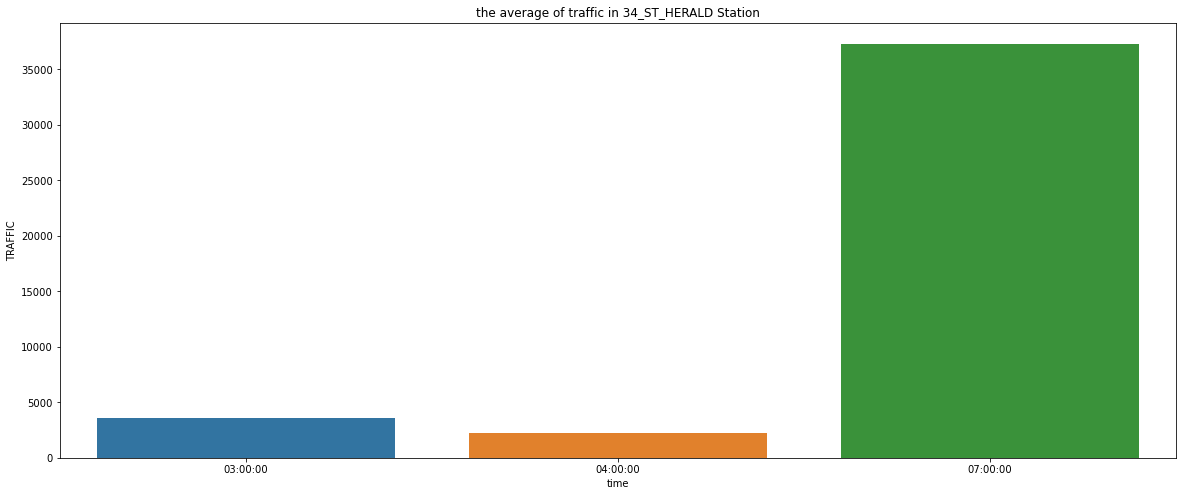

In [56]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'time', y = 'TRAFFIC',data = TRAFFIC_time_34_ST_HERALD ,ci=None).\
set(title='the average of traffic in 34_ST_HERALD Station')

- add sum of Registerars by group by of time(Station_34_ST_HERALD)

In [57]:
Station_34_ST_HERALD_time_Registerars= Station_34_ST_HERALD.groupby('time')[['Registerars']].sum().reset_index()
Registerars_time_34_ST_HERALD=Station_34_ST_HERALD_time_Registerars.sort_values('time', ascending=True).reset_index()

Registerars_time_34_ST_HERALD

,index,time,Registerars
0,0,03:00:00,3515
1,1,04:00:00,36
2,2,07:00:00,290


- draw the relation between time and Registerars in 34_ST_HERALD Station

[Text(0.5, 1.0, 'Registerars in 34_ST_HERALD Station')]

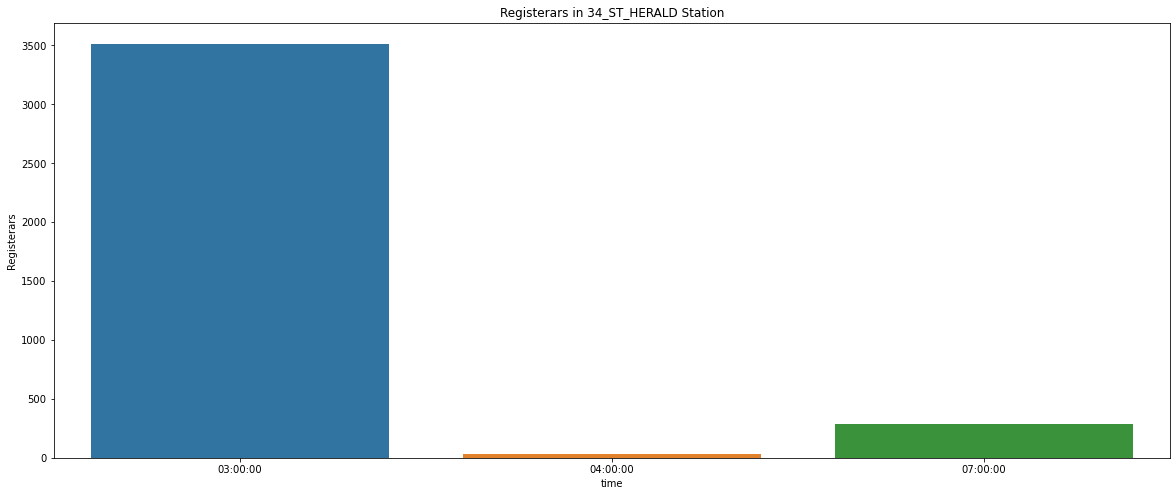

In [58]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'time', y = 'Registerars',data = Registerars_time_34_ST_HERALD ,ci=None).\
set(title='Registerars in 34_ST_HERALD Station')

- Plot to Time and Traffic 

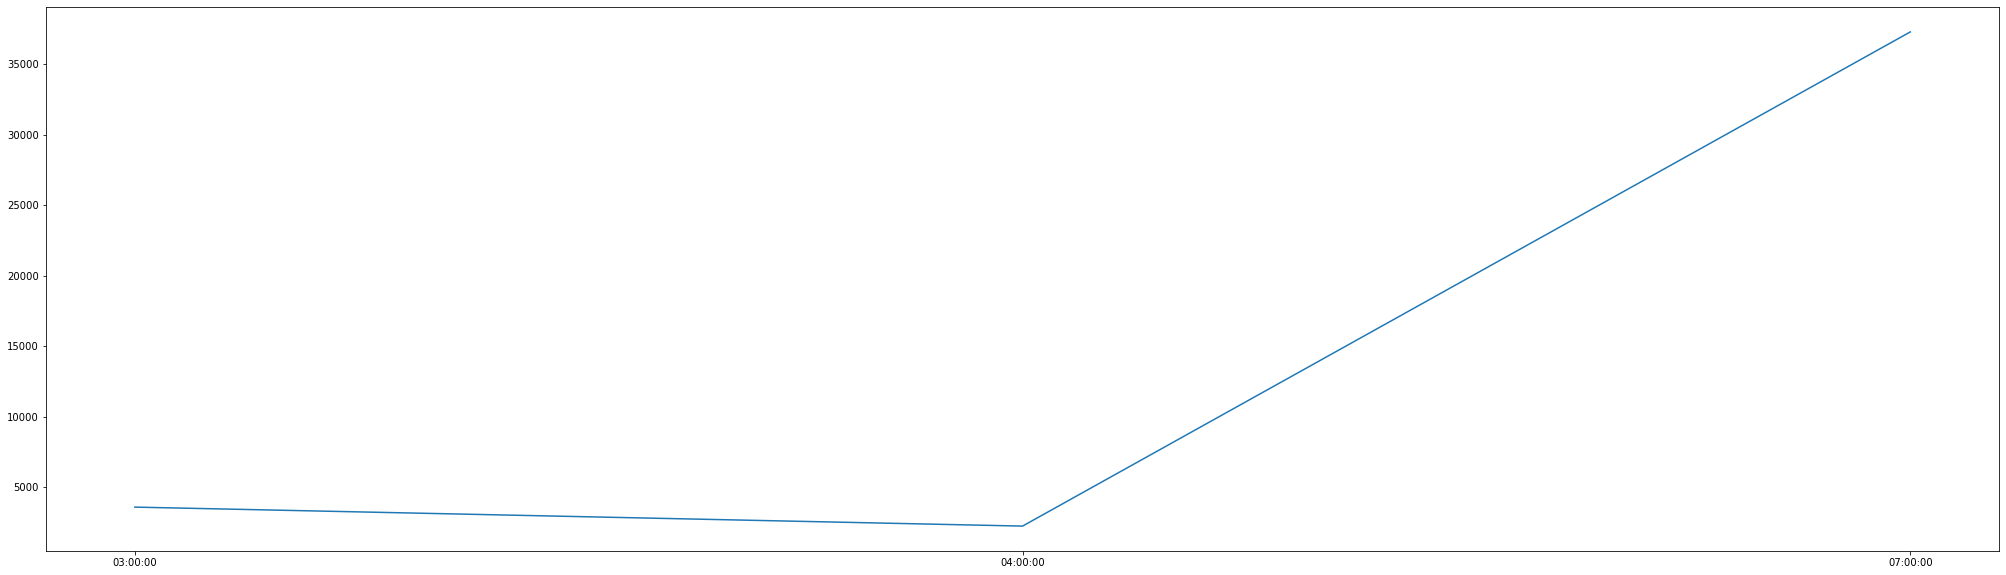

In [59]:
plt.figure(figsize=(35,10))
plt.plot(TRAFFIC_time_34_ST_HERALD.time,TRAFFIC_time_34_ST_HERALD.TRAFFIC)

- Plot to Time and Registerars 

# Using SQLalchemy

In [60]:
from sqlalchemy import create_engine
import pandas as pd 
engine=create_engine('sqlite://',echo=False)


StationFilter.to_sql('SQ_MTA',con=engine)

x=pd.read_sql('Select * from SQ_MTA',engine)
x

,level_0,index,C/A,unit,SCP,Station,Date_TIME,date,time,WEEKDAY,WEEKDAY_INDEX,entries,exits,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC,Registerars
0,0,1,A002,R051,02-00-00,59 ST,2019-12-29 03:00:00.000000,12/29/2019,03:00:00,Sunday,6,7325192,2482766,12/28/2019,7324295.0,2482512.0,897.0,254.0,1151.0,0
1,1,2,A002,R051,02-00-00,59 ST,2019-12-30 03:00:00.000000,12/30/2019,03:00:00,Monday,0,7325799,2482973,12/29/2019,7325192.0,2482766.0,607.0,207.0,814.0,0
2,2,3,A002,R051,02-00-00,59 ST,2019-12-31 03:00:00.000000,12/31/2019,03:00:00,Tuesday,1,7326977,2483383,12/30/2019,7325799.0,2482973.0,1178.0,410.0,1588.0,0
3,3,4,A002,R051,02-00-00,59 ST,2020-01-01 03:00:00.000000,01/01/2020,03:00:00,Wednesday,2,7328037,2483731,12/31/2019,7326977.0,2483383.0,1060.0,348.0,1408.0,0
4,4,5,A002,R051,02-00-00,59 ST,2020-01-02 03:00:00.000000,01/02/2020,03:00:00,Thursday,3,7328527,2483915,01/01/2020,7328037.0,2483731.0,490.0,184.0,674.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13715,262983,446539,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-22 01:00:00.000000,03/22/2020,01:00:00,Sunday,6,5554,508,03/21/2020,5554.0,508.0,0.0,0.0,0.0,0
13716,262984,446540,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-23 01:00:00.000000,03/23/2020,01:00:00,Monday,0,5554,514,03/22/2020,5554.0,508.0,0.0,6.0,6.0,0
13717,262985,446541,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-24 01:00:00.000000,03/24/2020,01:00:00,Tuesday,1,5554,514,03/23/2020,5554.0,514.0,0.0,0.0,0.0,0
13718,262986,446542,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-03-25 01:00:00.000000,03/25/2020,01:00:00,Wednesday,2,5554,514,03/24/2020,5554.0,514.0,0.0,0.0,0.0,0


- plot with SQL using sns Library

/Users/ezzowali/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Count for All stations')]

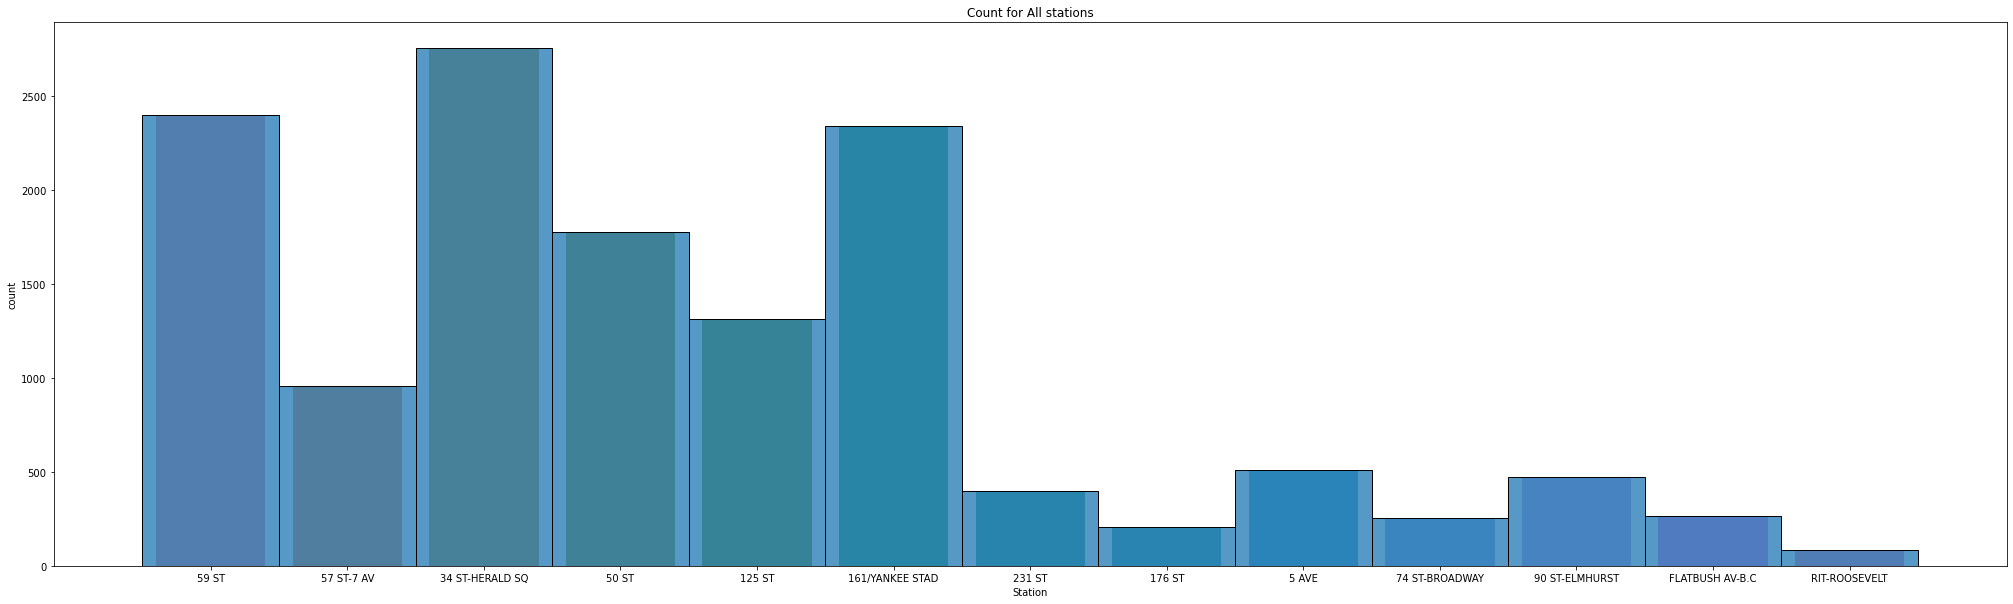

In [61]:
plt.figure(figsize=(35,10))
sns.countplot(x.loc[:, "Station"])

sns.histplot(x.loc[:, "Station"],kde=False).\
set(title='Count for All stations') # same as above but using seaborn 